## Import libreries

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_extraction.text import TfidfVectorizer

## Loading dataset

In [14]:
url = "https://raw.githubusercontent.com/DickySaragih/Ml_Terapan/refs/heads/main/Data_siswa.csv"  # Ganti dengan URL kamu

# Load dataset
siswa_df = pd.read_csv(url)

# Tampilkan struktur awal dataset
print("\nInformasi Dataset:")
siswa_df.info()
print("\nStatistik Deskriptif:")
print(siswa_df.describe())


Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB

Statistik Deskriptif:
       math score  reading score  writing score
count  1000.00000    1000.000000    1000.000000
mean     66.08900      69.169000      68.054000
std      15.16308      14.600192      15.195657
min       0.00000      17.000000      1

## Data Preparation

In [15]:
# Buat kolom target 'nilai_akhir' sebagai rata-rata dari tiga skor
siswa_df['nilai_akhir'] = siswa_df[['math score', 'reading score', 'writing score']].mean(axis=1)

# Konversi kolom tersebut menjadi representasi TF-IDF
if 'parental level of education' in siswa_df.columns:
    tfidf = TfidfVectorizer()
    tfidf_matrix = tfidf.fit_transform(siswa_df['parental level of education'].astype(str))
    tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf.get_feature_names_out())
    siswa_df = pd.concat([siswa_df.drop(columns=['parental level of education']), tfidf_df], axis=1)

# Pisahkan fitur dan target
y = siswa_df['nilai_akhir']
X = siswa_df.drop(columns=['nilai_akhir'])

# One-hot encoding untuk fitur kategorik
X_encoded = pd.get_dummies(X, drop_first=True)

# Split data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)


## Modeling


In [18]:
# Model 1: Regresi Linier
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

# Model 2: Decision Tree Regressor
dt_model = DecisionTreeRegressor(max_depth=5, random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

# Evaluasi Model

In [20]:
print("\nEvaluasi Regresi Linier")
print("R2 Score:", r2_score(y_test, y_pred_lr))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lr))) # Calculate RMSE manually

print("\nEvaluasi Decision Tree")
print("R2 Score:", r2_score(y_test, y_pred_dt))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_dt))) # Calculate RMSE manually


Evaluasi Regresi Linier
R2 Score: 1.0
RMSE: 1.7735568706636565e-14

Evaluasi Decision Tree
R2 Score: 0.9677026312392458
RMSE: 2.631249903298834


## Visualisasi Model

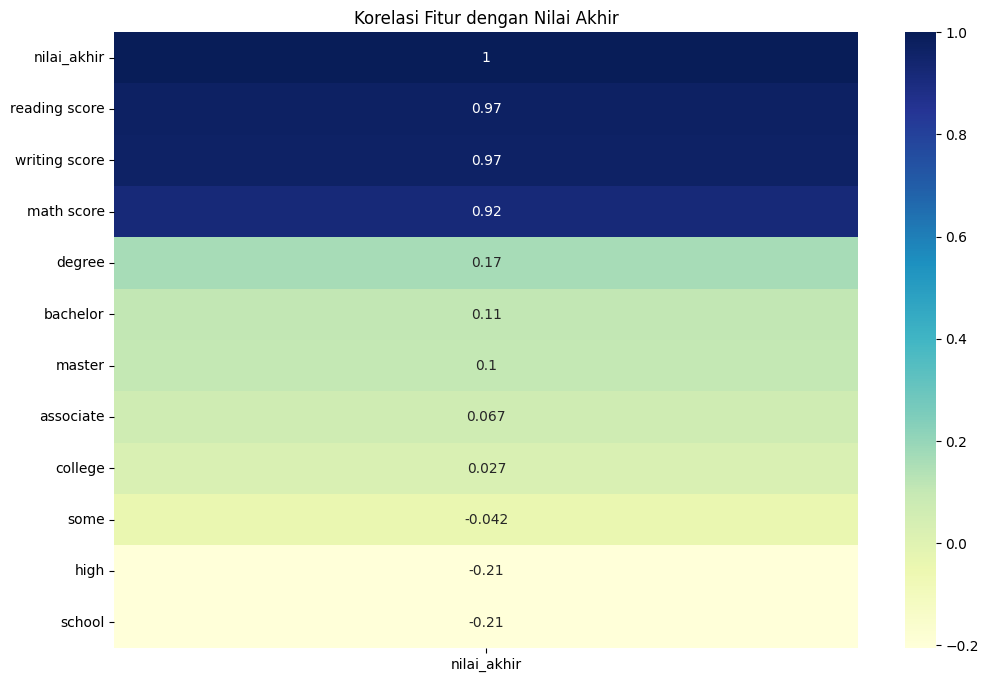

In [23]:
# Korelasi dengan nilai akhir
plt.figure(figsize=(12, 8))
corr = siswa_df.corr(numeric_only=True)
sns.heatmap(corr[['nilai_akhir']].sort_values(by='nilai_akhir', ascending=False), annot=True, cmap='YlGnBu')
plt.title("Korelasi Fitur dengan Nilai Akhir")
plt.show()
